 ### Predicting Sales of a product using machine learning
 
 ## Problem definition:
    To build a predictive model and find out the sales of each product at a particular store
    
 ## Data Source:-
          https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/
 
 ## Evaluation :- 
     We will use the Root Mean Square Error to check our accuracy. 
     
 ##  Features :- 
 
              ['Variable']                                            ['Description']

             Item_Identifier                        -> Unique product ID

             Item_Weight                            -> Weight of product

             Item_Fat_Content                       -> Whether the product is low fat or not

             Item_Visibility                        -> The % of total display area of all products in a 
                                                        store allocated  to the particular product

             Item_Type                              ->  The category to which the product belongs

             Item_MRP                               ->   Maximum Retail Price (list price) of the product

             Outlet_Identifier                      ->  Unique store ID

             Outlet_Establishment_Year              ->  The year in which store was established

            Outlet_Size                             ->  The size of the store in terms of ground area covered

            Outlet_Location_Type                    ->   The type of city in which the store is located

            Outlet_Type                             ->   Whther the outlet is just a grocery store
                                                         or some sort of supermarket

            Item_Outlet_Sales                       ->   Sales of the product in the particulat store.
                                                          his is the outcome variable to be predicted.


## Importing Libraries required for Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.formula.api as sm

## Loading the Dataset

In [2]:
train_df=pd.read_csv('Train.csv')

In [3]:
train_df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC1,FDN15,FDX7,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.164731,0.192782,0.167675,NaN,NaN
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.892,48.2692,141.618,182.95,53.8614
Outlet_Identifier,OUT49,OUT18,OUT49,OUT1,OUT13
Outlet_Establishment_Year,1999,29,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


## Checking for Categorical and Numerical Features

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              7997 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


## Exploring the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005C92D10FD0>,
      dtype=object)

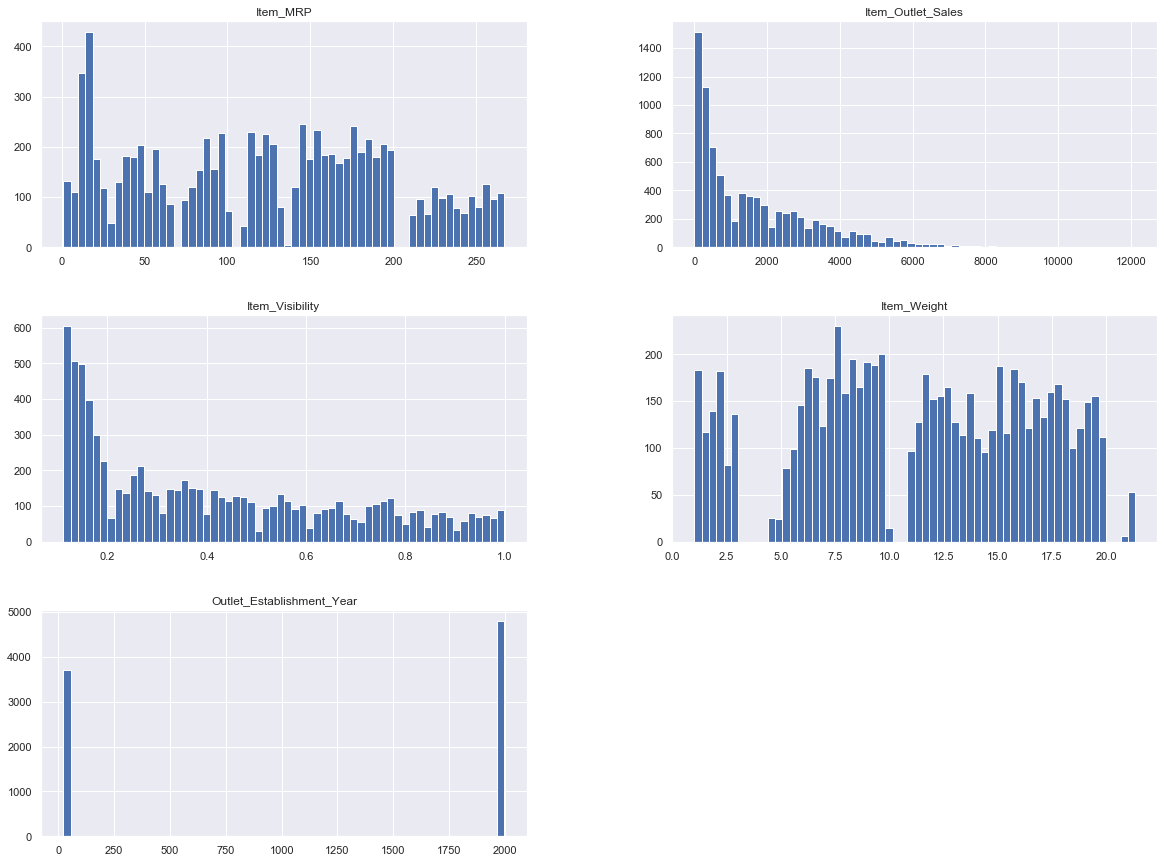

In [6]:
train_df.hist(bins=60, figsize=(20,15))

In [8]:
train_df.Item_Outlet_Sales.value_counts()

958.7520     17
1342.2528    16
1845.5976    15
73.8480      15
123.3984     14
1278.3360    14
759.1200     13
1416.8224    13
1211.7560    12
539.2980     12
1438.1280    12
575.2512     12
1537.9980    11
181.9760     11
197.7680     11
134.9680     11
171.7848     11
146.1696     11
219.2544     11
852.2240     11
2277.3600    11
639.1680     11
679.1160     11
2348.9424    10
1571.2880    10
147.8640     10
3415.5540    10
2117.2440    10
2696.4900    10
32.6880      10
             ..
4863.3200     1
3221.1440     1
264.3226      1
3456.1678     1
6855.7680     1
3673.8844     1
249.5320      1
58.4496       1
5695.2532     1
2912.8750     1
95.2940       1
8417.7940     1
1684.4740     1
313.4180      1
7142.7240     1
94.1564       1
4677.2450     1
3472.1470     1
5742.5250     1
3451.5720     1
74.5696       1
7.4216        1
1689.8400     1
358.2400      1
5478.2240     1
7116.7400     1
8323.8316     1
3944.8650     1
283.3158      1
2739.1120     1
Name: Item_Outlet_Sales,

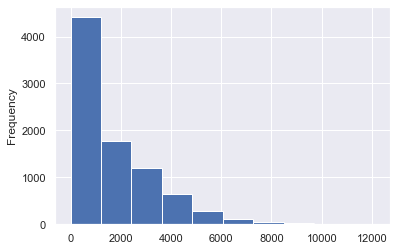

In [9]:
train_df.Item_Outlet_Sales.plot.hist()

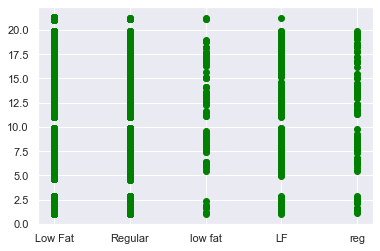

In [10]:
plt.scatter(train_df['Item_Fat_Content'],train_df['Item_Weight'],c='Green')

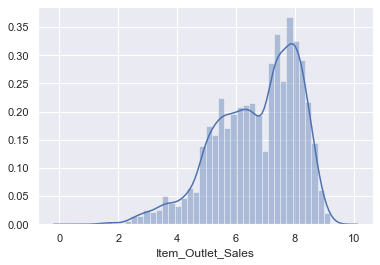

In [11]:
sns.distplot(np.log(train_df['Item_Outlet_Sales']))

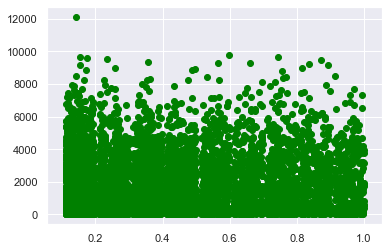

In [12]:
plt.scatter(train_df.Item_Visibility,train_df.Item_Outlet_Sales,c='Green')

## Checking for Null values if any

In [13]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Handling the Missing Value of Feature['Outlet_Size']
        After carefully analyzing the dataset we found some relation between location type and outlet size 

In [14]:
train_df['Outlet_Size']=train_df.groupby(by=['Outlet_Location_Type']).Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))

In [15]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.164731,Dairy,249.8920,OUT49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC1,5.920,Regular,0.192782,Soft Drinks,48.2692,OUT18,29,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.167675,Meat,141.6180,OUT49,1999,Medium,Tier 1,Supermarket Type1,297.2700
3,FDX7,19.200,Regular,NaN,Fruits and Vegetables,182.9500,OUT1,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,NaN,Household,53.8614,OUT13,1987,High,Tier 3,Supermarket Type1,994.7520
5,FDP36,1.395,Regular,NaN,Baking Goods,51.4800,OUT18,29,Medium,Tier 3,Supermarket Type2,556.6880
6,FDO1,13.650,Regular,0.127419,Snack Foods,57.6588,OUT13,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP1,NaN,Low Fat,0.127470,Snack Foods,17.7622,OUT27,1985,Medium,Tier 3,Supermarket Type3,422.7636
8,FDH17,16.200,Regular,0.166871,Frozen Foods,96.9726,OUT45,22,Small,Tier 2,Supermarket Type1,176.5986
9,FDU28,19.200,Regular,0.944496,Frozen Foods,187.8214,OUT17,27,Small,Tier 2,Supermarket Type1,471.5350


In [17]:
train_df2=train_df.copy()


In [18]:
train_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
24       930
22       929
29       928
27       926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

## Handling Values which was incorrect in Feature['Outlet_Establishment_Year']
        There were some values in year which was incorrect and could have been misinterpreted
        such as establishment year 2004 was given as 24 , 2007 as 27 , 2002 as 22 

In [19]:
train_df['Outlet_Establishment_Year']=train_df['Outlet_Establishment_Year'].replace(to_replace=[24,22,27,29],
                                                                                    value=[2004,2002,2007,2009])

In [20]:
train_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

## Handling the Missing Value of Feature['Item_Weight']
        After carefully analyzing the dataset we found some values of Item_Weight were missing 
        which were changed by value =mean of Item_weight

In [21]:
train_df2['Item_Weight']=train_df2.groupby(by=['Item_Fat_Content']).Item_Weight.transform(lambda x: x.fillna(x.mean()))

In [22]:
train_df['Item_Weight']=train_df.groupby(by=['Item_Fat_Content']).Item_Weight.transform(lambda x: x.fillna(x.mean()))

## Handling the Missing Value of Feature['Item_Visibility']
     we will be replacing the missing value with median values 

In [23]:
train_df['Item_Visibility']=train_df['Item_Visibility'].fillna(train_df['Item_Visibility'].mean())

## Checking the null values once again after performing above operations 

In [24]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Combining items with different Item identifier into three specific groups 

In [26]:
train_df['Item_Identifier']=train_df['Item_Identifier'].replace(to_replace=['FDF4','FDR$','FDF2','FDB5',
                                                                            'FDW2','FDO4','FDG9','FDP25','FDU12',
    'FDJ4','FDJ2','FDU4','FDF56','FDH2','FDN4','FDW26',
'FDN2','FDV38','FDA13','FDJ58','FDU9','FDG28','FDI36','FDF38',
'FD48','FDA22','FDE58','FDB1','FDT35'],value=['Food'])

In [27]:
train_df['Item_Identifier']=train_df['Item_Identifier'].replace(to_replace=['FDX4','FDD5','FDU2',
                                                                      'FDK2','FDX2','FDA4','FDB4','FDS4',
'FDA2','FDH5','FDI4','FDA1','FDQ4','FDD4','FDL4','FDV2',
'FDY4','FDR1','FDQ1','FDR2','FDZ2','FDF5','FDL2','FDM1',
'FDY2','FDI2','FDC2','FDO1'],value=['Food'])

NameError: name 'df' is not defined

In [39]:
train_df['Item_Identifier']=df['Item_Identifier'].replace(to_replace=['NCH43','NCN18','NCJ19',
                                                                      'NCJ29','NCK53','NCD19',
                                                                      'NCI54'],value=['Non Consumable Durable'])

NameError: name 'df' is not defined

In [40]:
train_df['Item_Identifier']=df['Item_Identifier'].replace(to_replace=['DRJ59','DRG1','DRJ59',
                                                                      'DRI11','DRC1','DRF37',
                                                                      'FDB4','FDS4',],value=['Drinks'])

NameError: name 'df' is not defined

In [41]:
ntrain_df=pd.read_csv('trainML.csv')

In [42]:
ntrain_df.head().T

,0,1,2,3,4
Item_Identifier,Food,Drinks,Food,Food,Non Consumable Durable
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0.011,0.011
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,Medium,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000ADEC3B8BE0>,
      dtype=object)

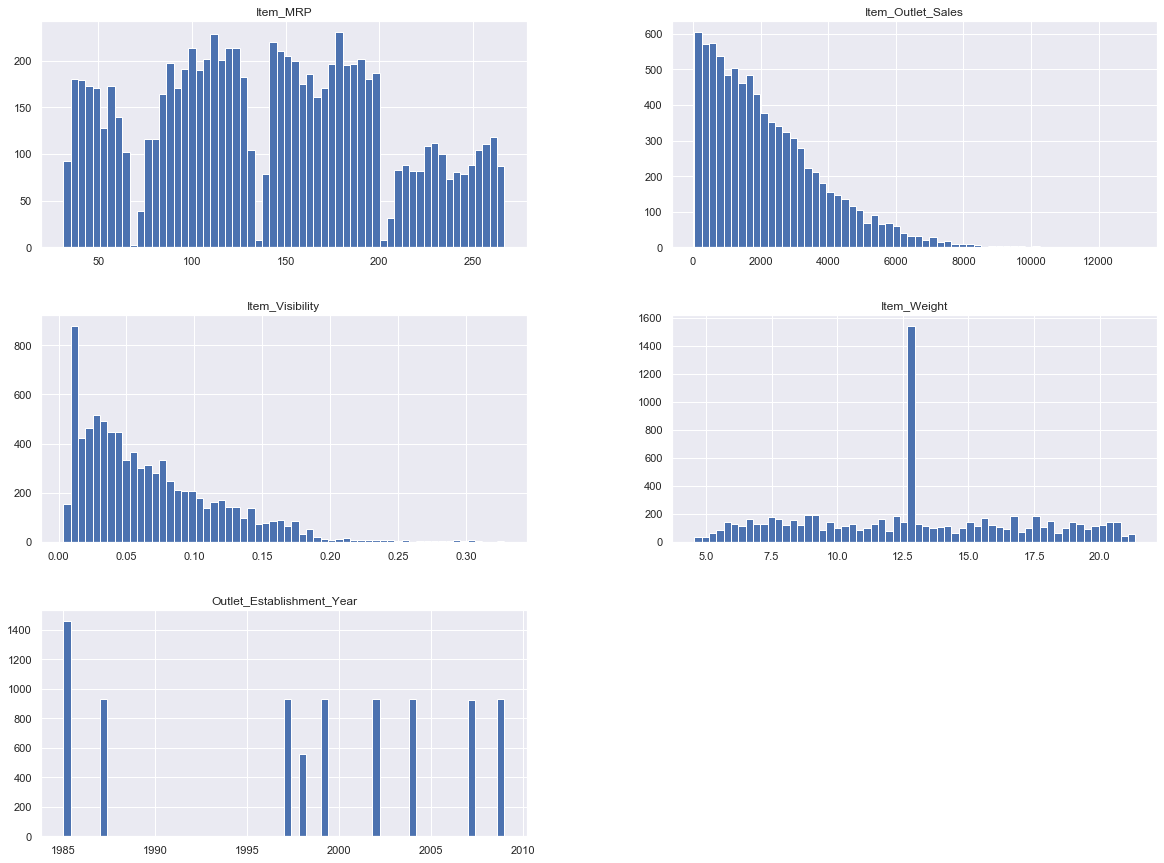

In [43]:
ntrain_df.hist(bins=60, figsize=(20,15))

In [45]:
ntrain_df.Item_Weight.value_counts()

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
15.100000      68
9.300000       68
16.700000      66
10.500000      66
19.350000      63
20.700000      62
16.000000      62
9.800000       61
17.750000      60
17.700000      60
15.850000      59
18.850000      59
15.000000      59
19.600000      58
16.750000      58
18.250000      58
15.700000      57
12.500000      56
9.195000       56
20.200000      53
12.100000      53
12.600000      53
10.195000      53
15.600000      52
13.500000      51
             ... 
5.305000        3
6.305000        3
7.710000        3
7.105000        3
5.825000        3
6.460000        3
5.425000        3
6.895000        2
8.920000        2
6.325000        2
6.400000        2
4.905000        2
5.675000        2
5.155000        2
7.275000        2
5.210000        2
8.485000        2
8.800000        2
5.885000        2
7.605000        2
6.405000        2
5.735000        2
8.670000        2
6.775000        2
7.890000  

## Checking for Outliers

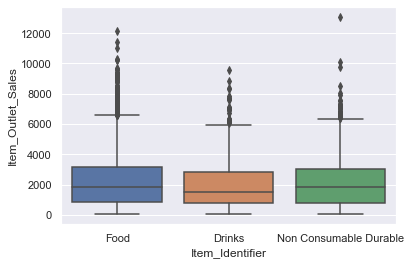

In [43]:
sns.boxplot(x="Item_Identifier", y="Item_Outlet_Sales", data=ntrain_df1)

In [44]:
ntrain_df1=ntrain_df1[ntrain_df1['Item_Outlet_Sales']<6100]

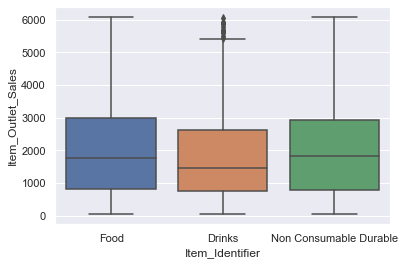

In [45]:
sns.boxplot(x="Item_Identifier", y="Item_Outlet_Sales", data=ntrain_df1)

## Creating Dummies for categorical Features

In [46]:
ndf=pd.get_dummies(ntrain_df)

In [47]:
ndf.head().T

,0,1,2,3,4
Item_Weight,9.300000,5.920000,17.50000,19.200,8.9300
Item_Visibility,0.016047,0.019278,0.01676,0.011,0.0110
Item_MRP,249.809200,48.269200,141.61800,182.095,53.8614
Outlet_Establishment_Year,1999.000000,2009.000000,1999.00000,1998.000,1987.0000
Item_Outlet_Sales,3735.138000,443.422800,2097.27000,732.380,994.7052
Item_Identifier_Drinks,0.000000,1.000000,0.00000,0.000,0.0000
Item_Identifier_Food,1.000000,0.000000,1.00000,1.000,0.0000
Item_Identifier_Non Consumable Durable,0.000000,0.000000,0.00000,0.000,1.0000
Item_Fat_Content_Low Fat,1.000000,0.000000,1.00000,0.000,1.0000
Item_Fat_Content_Regular,0.000000,1.000000,0.00000,1.000,0.0000


In [50]:
ndf.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_Non Consumable Durable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,1.000000e+00,-0.012990,0.024756,-0.008301,0.011550,-0.050492,-0.007953,0.046858,0.021157,-0.021263,...,0.012313,-0.006867,-0.001100,0.003965,-0.014675,0.010447,0.002568,-0.002649,0.001299,-2.845873e-10
Item_Visibility,-1.298992e-02,1.000000,-0.001953,-0.075887,-0.130349,-0.017754,0.068539,-0.065688,-0.048040,0.048534,...,-0.042484,-0.032099,0.064378,0.062132,-0.070038,0.010129,0.290361,-0.146662,-0.034592,-5.177203e-02
Item_MRP,2.475610e-02,-0.001953,1.000000,0.005020,0.567574,-0.051733,0.029315,0.004859,-0.006063,0.008299,...,0.002438,-0.010578,0.009793,-0.001229,0.001951,-0.000744,-0.004277,0.004885,0.003850,-6.713699e-03
Outlet_Establishment_Year,-8.300836e-03,-0.075887,0.005020,1.000000,-0.049135,0.009441,-0.002312,-0.004385,-0.003151,-0.002051,...,-0.453388,0.342251,-0.056567,-0.201690,0.540820,-0.333895,-0.281196,0.245070,0.466336,-5.380723e-01
Item_Outlet_Sales,1.155000e-02,-0.130349,0.567574,-0.049135,1.000000,-0.034672,0.031905,-0.010861,-0.018719,0.022618,...,0.024170,0.075154,-0.098403,-0.111287,0.058261,0.046376,-0.411727,0.108765,-0.038059,3.111920e-01
Item_Identifier_Drinks,-5.049245e-02,-0.017754,-0.051733,0.009441,-0.034672,1.000000,-0.514021,-0.154560,0.177593,-0.170786,...,-0.000479,0.003498,-0.003465,0.001016,0.007652,-0.008283,-0.003055,0.011999,-0.003872,-1.114516e-02
Item_Identifier_Food,-7.952640e-03,0.068539,0.029315,-0.002312,0.031905,-0.514021,1.000000,-0.768023,-0.423092,0.409475,...,-0.003993,0.000480,0.002254,0.001673,-0.000235,-0.001312,-0.005712,-0.003772,0.003433,8.406125e-03
Item_Identifier_Non Consumable Durable,4.685780e-02,-0.065688,0.004859,-0.004385,-0.010861,-0.154560,-0.768023,1.000000,0.354722,-0.344121,...,0.004957,-0.003165,-0.000008,-0.002685,-0.005443,0.007695,0.008860,-0.004614,-0.001063,-1.361078e-03
Item_Fat_Content_Low Fat,2.115731e-02,-0.048040,-0.006063,-0.003151,-0.018719,0.177593,-0.423092,0.354722,1.000000,-0.970113,...,0.002132,-0.003495,0.002313,-0.003155,0.003272,-0.000241,0.002924,-0.000533,-0.002129,-1.825365e-04
Item_Fat_Content_Regular,-2.126293e-02,0.048534,0.008299,-0.002051,0.022618,-0.170786,0.409475,-0.344121,-0.970113,1.000000,...,-0.002316,0.000693,0.000856,0.001960,-0.002123,0.000237,-0.002307,-0.000734,-0.002037,5.605465e-03


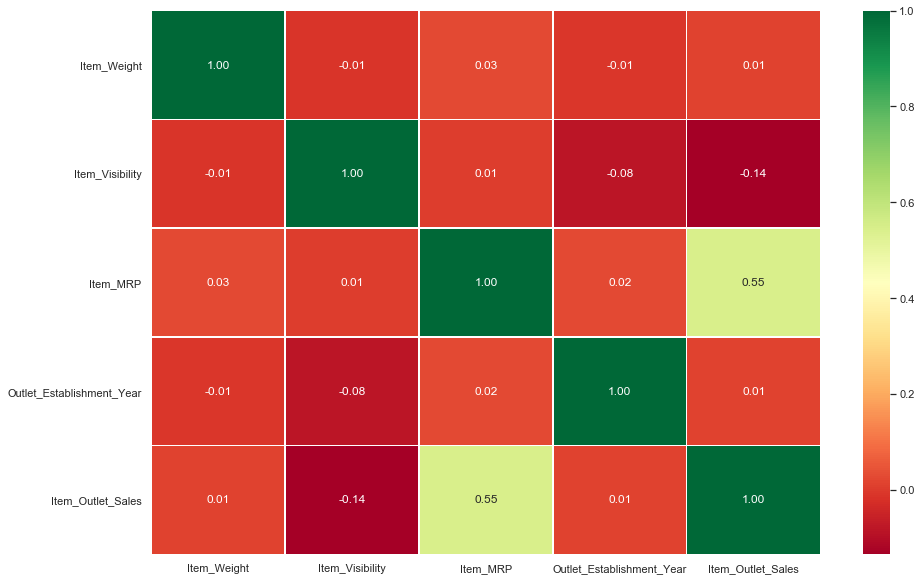

In [53]:
corr_matrix=ntrain_df1.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt='.2f',cmap='RdYlGn')

In [61]:
ndf.columns.values

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Identifier_Drinks', 'Item_Identifier_Food',
       'Item_Identifier_Non Consumable Durable',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_reg', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Out

## Checking Multicollinearlity

In [63]:
variable=ndf[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Identifier_Drinks', 'Item_Identifier_Food',
       'Item_Identifier_Non Consumable Durable',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_reg', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']]

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variable.values,i) for i in range(variable.shape[1])]
vif['Features']=variable.columns
vif

C:\Users\Shashi\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Features
0,1.014585,Item_Weight
1,1.106517,Item_Visibility
2,1.757951,Item_MRP
3,inf,Outlet_Establishment_Year
4,2.292624,Item_Outlet_Sales
5,inf,Item_Identifier_Drinks
6,inf,Item_Identifier_Food
7,inf,Item_Identifier_Non Consumable Durable
8,inf,Item_Fat_Content_Low Fat
9,inf,Item_Fat_Content_Regular


## Creating target and feature variable

In [71]:
X=ndf.drop(['Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1)
Y=np.log(ndf['Item_Outlet_Sales'])

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
input_scale=scaler.transform(X)
input_scale

array([[-0.84187169, -0.99955464,  1.74745381, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.64170589, -0.93593669, -1.48902325, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 1.09855449, -0.98551985,  0.01004021, ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.53424315, -0.622701  , -0.89720755, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.33644372,  1.54391794, -0.60797692, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.45963367, -0.43186163, -1.05226104, ...,  0.72680189,
        -0.34955064, -0.35102831]])

In [76]:
import statsmodels.api as sm

In [77]:
X0=sm.add_constant(X)

C:\Users\Shashi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [78]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
xtrain,xtest,ytrain,ytest=train_test_split(X0,Y,test_size=0.2,random_state=42)

## Applying Linear Regression

In [79]:

results=sm.OLS(ytrain,xtrain).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     577.6
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:43:38   Log-Likelihood:                -5447.8
No. Observations:                6818   AIC:                         1.096e+04
Df Residuals:                    6787   BIC:                         1.117e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      2.0085      0.012    161.310      0.000       1.984       2.033
Item_Weight                               -0.0019      0.002     -1.202      0.230      -0.005       0.001
Item_Visibility                           -0.1488      0.136     -1.095      0.273      -0.415       0.117
Item_MRP                                   0.0083      0.000     78.697      0.000       0.008       0.008
Item_Identifier_Drinks                     0.6962      0.037     18.711      0.000       0.623       0.769
Item_Identifier_Food                       0.6942      0.024     28.381      0.000       0.646       0.742
Item_Identifier_Non Consumable Durable     0.6181      0.015     40.449      0.000       0.588       0.648
Item_Fat_Content_Low Fat                   0.6799      0.019     36.635      0.000       0.644       0.716
Item_Fat_Content_Regular                   0.6952      0.019     36.327      0.000       0.658       0.733
Item_Fat_Content_reg                       0.6333      0.040     15.876      0.000       0.555       0.712
Item_Type_Baking Goods                     0.1186      0.027      4.429      0.000       0.066       0.171
Item_Type_Breads                           0.1246      0.039      3.179      0.001       0.048       0.201
Item_Type_Breakfast                        0.0801      0.056      1.433      0.152      -0.029       0.190
Item_Type_Canned                           0.1401      0.027      5.256      0.000       0.088       0.192
Item_Type_Dairy                            0.0442      0.024      1.848      0.065      -0.003       0.091
Item_Type_Frozen Foods                     0.0724      0.024      2.979      0.003       0.025       0.120
Item_Type_Fruits and Vegetables            0.1290      0.022      5.926      0.000       0.086       0.172
Item_Type_Hard Drinks                      0.1101      0.062      1.783      0.075      -0.011       0.231
Item_Type_Health and Hygiene               0.2333      0.024      9.741      0.000       0.186       0.280
Item_Type_Household                        0.1822      0.021      8.776      0.000       0.141       0.223
Item_Type_Meat                             0.1315      0.032      4.166      0.000       0.070       0.193
Item_Type_Others                           0.2026      0.035      5.835      0.000       0.135       0.271
Item_Type_Seafood                          0.1629      0.074      2.216      0.027       0.019       0.307
Item_Type_Snack Foods                      0.1173      0.022      5.339      0.000       0.074       0.160
Item_Type_Soft Drinks                      0.0886      0.056      1.578      0.115      -0.021       0.199
Item_Type_Starchy Foods                    0.0709      0.047      1.521      0.128     

In [83]:
reg=LinearRegression()
reg.fit(xtrain,ytrain)
reg.score(xtest,ytest)


0.7302561390874909

In [100]:
from sklearn.metrics import mean_absolute_error
y_preds=reg.predict(xtest)
mae=mean_absolute_error(np.exp(ytest),np.exp(y_preds))
mae



744.944779303206

In [102]:
from sklearn.metrics import mean_squared_error
y_preds=reg.predict(xtest)
MSE=mean_squared_error(np.exp(ytest),np.exp(y_preds))
MSE

1177847.544922762

In [105]:
from math import sqrt
rmse=sqrt(MSE)
rmse

1085.2868491430097

## Model 2

In [98]:
X2=ndf.drop(['Item_Weight', 'Item_Visibility', 
       'Outlet_Establishment_Year', 'Item_Outlet_Sales','Item_Fat_Content_Regular',
             'Item_Type_Breakfast','Item_Fat_Content_Low Fat','Item_Fat_Content_reg',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods','Item_Type_Baking Goods','Item_Type_Breads',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks','Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods','Item_Type_Seafood'],axis=1)
Y1=np.log(ndf['Item_Outlet_Sales'])
X3=sm.add_constant(X2)
results=sm.OLS(Y1,X3).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1292.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:30:46   Log-Likelihood:                -6799.7
No. Observations:                8523   AIC:                         1.364e+04
Df Residuals:                    8505   BIC:                         1.376e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      2.2854      0.006    357.945      0.000       2.273       2.298
Item_MRP                                   0.0083   9.39e-05     88.408      0.000       0.008       0.008
Item_Identifier_Drinks                     0.8232      0.014     58.665      0.000       0.796       0.851
Item_Identifier_Food                       0.8290      0.010     86.328      0.000       0.810       0.848
Item_Identifier_Non Consumable Durable     0.6332      0.011     57.557      0.000       0.612       0.655
Item_Type_Canned                           0.0513      0.023      2.247      0.025       0.007       0.096
Item_Type_Health and Hygiene               0.2267      0.021     10.717      0.000       0.185       0.268
Item_Type_Household                        0.1890      0.018     10.254      0.000       0.153       0.225
Item_Type_Meat                             0.0502      0.028      1.824      0.068      -0.004       0.104
Item_Type_Others                           0.2175      0.031      6.945      0.000       0.156       0.279
Item_Type_Snack Foods                      0.0238      0.018      1.335      0.182      -0.011       0.059
Outlet_Identifier_OUT010                  -0.5306      0.012    -43.182      0.000      -0.555      -0.506
Outlet_Identifier_OUT013                   0.3513      0.006     55.601      0.000       0.339       0.364
Outlet_Identifier_OUT017                   0.1463      0.014     10.553      0.000       0.119       0.173
Outlet_Identifier_OUT018                   0.4447      0.008     57.365      0.000       0.429       0.460
Outlet_Identifier_OUT019                   0.1630      0.012     14.151      0.000       0.140       0.186
Outlet_Identifier_OUT027                   0.7995      0.008    103.461      0.000       0.784       0.815
Outlet_Identifier_OUT035                   0.3850      0.011     34.684      0.000       0.363       0.407
Outlet_Identifier_OUT045                   0.0737      0.014      5.321      0.000       0.047       0.101
Outlet_Identifier_OUT046                   0.3114      0.013     24.791      0.000       0.287       0.336
Outlet_Identifier_OUT049                   0.1410      0.011     13.284      0.000       0.120       0.162
Outlet_Size_High                           0.3513      0.006     55.601      0.000       0.339       0.364
Outlet_Size_Medium                         1.0746      0.006    166.775      0.000       1.062       1.087
Outlet_Size_Small                          0.8594      0.007    127.193      0.000       0.846       0.873
Outlet_Location_Type_Tier 1                0.6154      0.007     88.662      0.000       0.602       0.629
Outlet_Location_Type_Tier 2                0.6050      0.006     95.879      0.000     

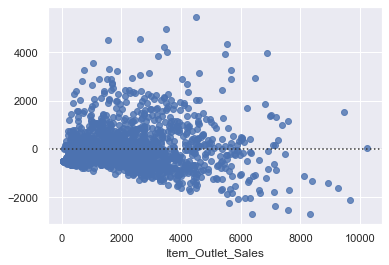

In [106]:
sns.residplot(np.exp(ytest),np.exp(y_preds))

## Model 3

In [120]:
X11=ndf.drop(['Item_Weight','Item_Visibility'],axis=1)
Y11=np.log(ndf['Item_Outlet_Sales'])
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X11)
input_scale=scaler.transform(X11)
input_scale
#from sklearn.model_selection import train_test_split
np.random.seed(42)
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X11,Y11,test_size=0.2,random_state=42)

reg1=LinearRegression()
reg1.fit(xtrain1,ytrain1)
reg1.score(xtest1,ytest1)


0.8715722050597118

## Full Summary of Linear  Regression of above model

In [123]:
X11=ndf.drop(['Item_Weight','Item_Visibility'],axis=1)
Y11=np.log(ndf['Item_Outlet_Sales'])
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X11)
input_scale=scaler.transform(X11)
input_scale
#from sklearn.model_selection import train_test_split
np.random.seed(42)
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X11,Y11,test_size=0.2,random_state=42)

X3=sm.add_constant(xtrain1)
results=sm.OLS(ytrain1,xtrain1).fit()
results.summary()

C:\Users\Shashi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1569.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:55:55   Log-Likelihood:                -2809.4
No. Observations:                6818   AIC:                             5679.
Df Residuals:                    6788   BIC:                             5884.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Item_MRP                                   0.0029   9.39e-05     30.599      0.000       0.003       0.003
Outlet_Establishment_Year                  0.0030   9.94e-06    300.589      0.000       0.003       0.003
Item_Outlet_Sales                          0.0003   3.88e-06     89.085      0.000       0.000       0.000
Item_Identifier_Drinks                    -0.0073      0.024     -0.305      0.761      -0.055       0.040
Item_Identifier_Food                      -0.0100      0.017     -0.575      0.565      -0.044       0.024
Item_Identifier_Non Consumable Durable     0.0167      0.010      1.588      0.112      -0.004       0.037
Item_Fat_Content_Low Fat                   0.0073      0.014      0.532      0.595      -0.020       0.034
Item_Fat_Content_Regular                   0.0057      0.014      0.408      0.684      -0.022       0.033
Item_Fat_Content_reg                      -0.0137      0.026     -0.535      0.593      -0.064       0.036
Item_Type_Baking Goods                     0.0166      0.018      0.917      0.359      -0.019       0.052
Item_Type_Breads                           0.0332      0.027      1.252      0.211      -0.019       0.085
Item_Type_Breakfast                       -0.0463      0.038     -1.222      0.222      -0.121       0.028
Item_Type_Canned                           0.0297      0.018      1.646      0.100      -0.006       0.065
Item_Type_Dairy                           -0.0276      0.016     -1.701      0.089      -0.059       0.004
Item_Type_Frozen Foods                    -0.0261      0.016     -1.586      0.113      -0.058       0.006
Item_Type_Fruits and Vegetables            0.0109      0.015      0.740      0.459      -0.018       0.040
Item_Type_Hard Drinks                      0.0064      0.042      0.152      0.879      -0.076       0.089
Item_Type_Health and Hygiene               0.0230      0.016      1.412      0.158      -0.009       0.055
Item_Type_Household                       -0.0185      0.014     -1.309      0.191      -0.046       0.009
Item_Type_Meat                             0.0294      0.021      1.377      0.169      -0.012       0.071
Item_Type_Others                           0.0122      0.024      0.517      0.605      -0.034       0.058
Item_Type_Seafood                         -0.0173      0.050     -0.348      0.728      -0.115       0.080
Item_Type_Snack Foods                      0.0181      0.015      1.222      0.222      -0.011       0.047
Item_Type_Soft Drinks                     -0.0031      0.038     -0.082      0.935      -0.078       0.072
Item_Type_Starchy Foods                   -0.0414      0.032     -1.309      0.190      -0.103       0.021
Outlet_Identifier_OUT010                  -0.3566      0.010    -36.579      0.000     

## So after trying various model , we can see when two variable i.e. Item_weight and Item_visibility are removed from the previous model and now  we are able to explain 87% of the variation in sales of particular product